In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [56]:
store=pd.read_csv("SampleSuperstore.csv")

# Understanding Data

In [57]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [58]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [59]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


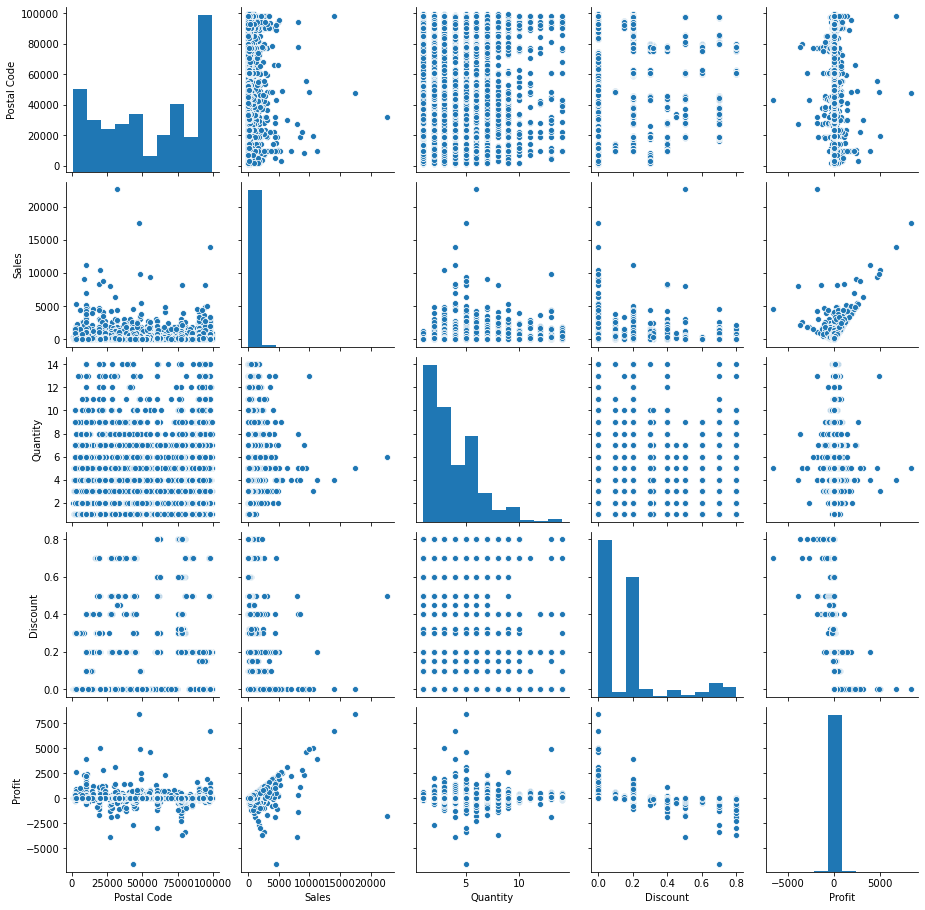

In [60]:
sns.pairplot(store)
plt.show()

In [61]:
store.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

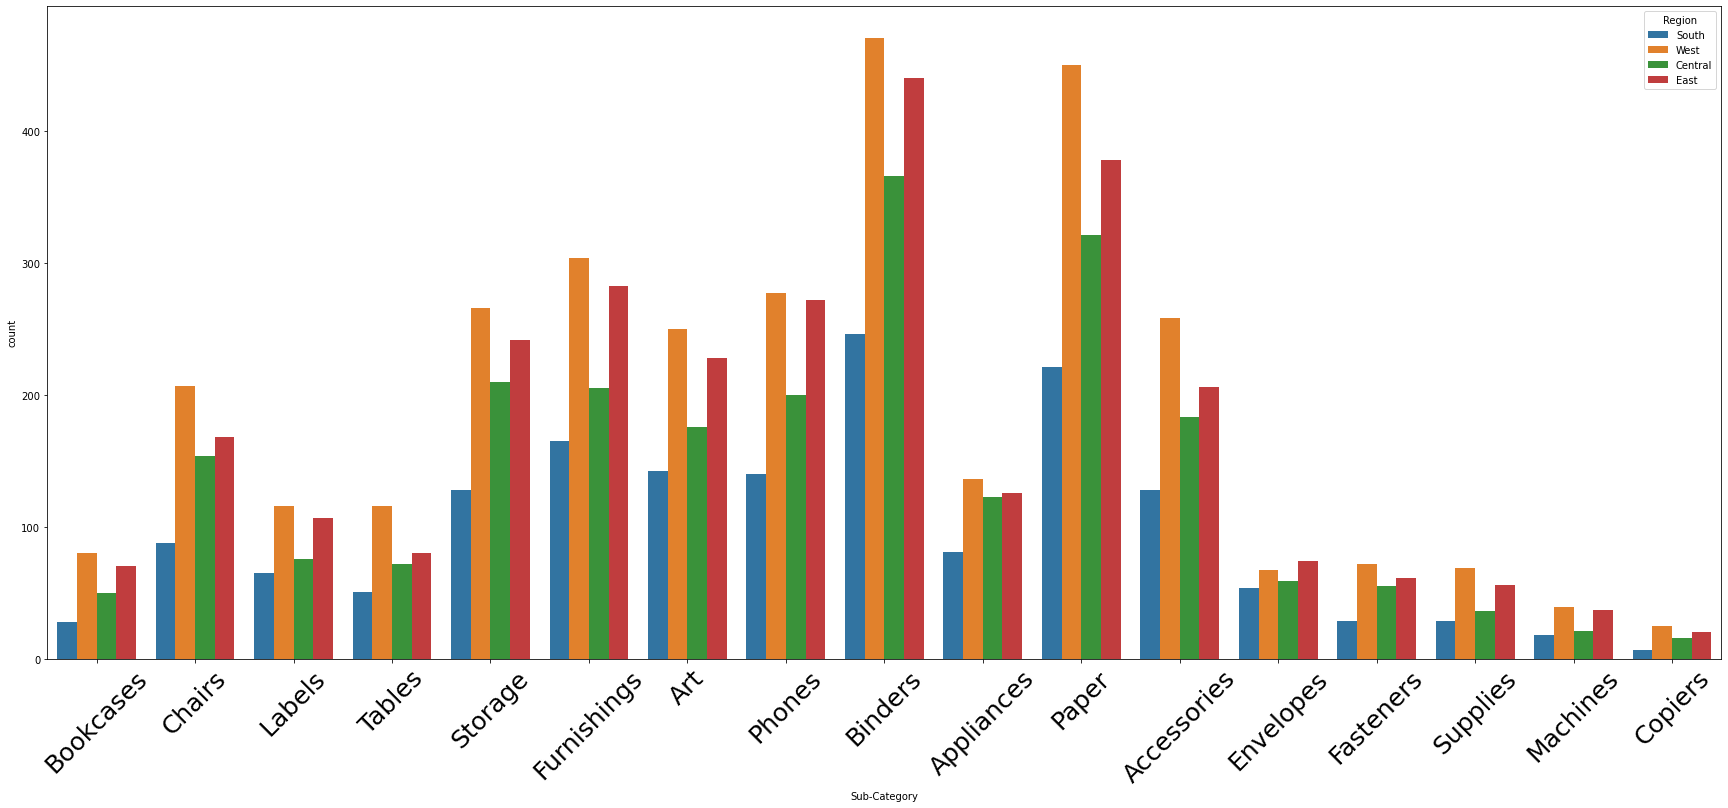

In [62]:
plt.figure(figsize=(30,12))
sns.countplot(x= 'Sub-Category', hue='Region', data=store)
plt.xticks(rotation=45, fontsize= 25)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

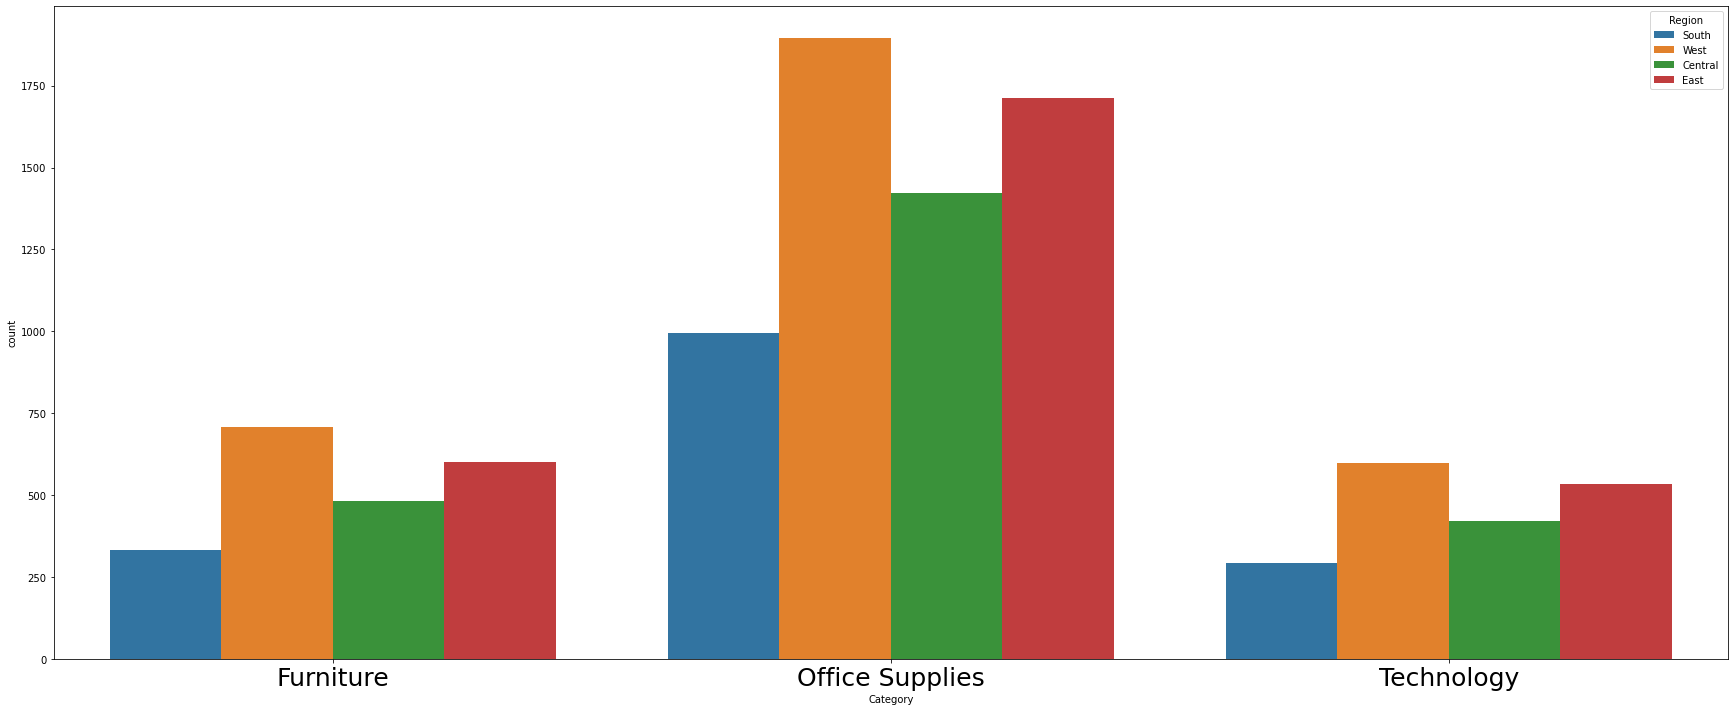

In [63]:
plt.figure(figsize=(30,12))
sns.countplot(x= 'Category', hue='Region', data=store)
plt.xticks( fontsize= 25)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

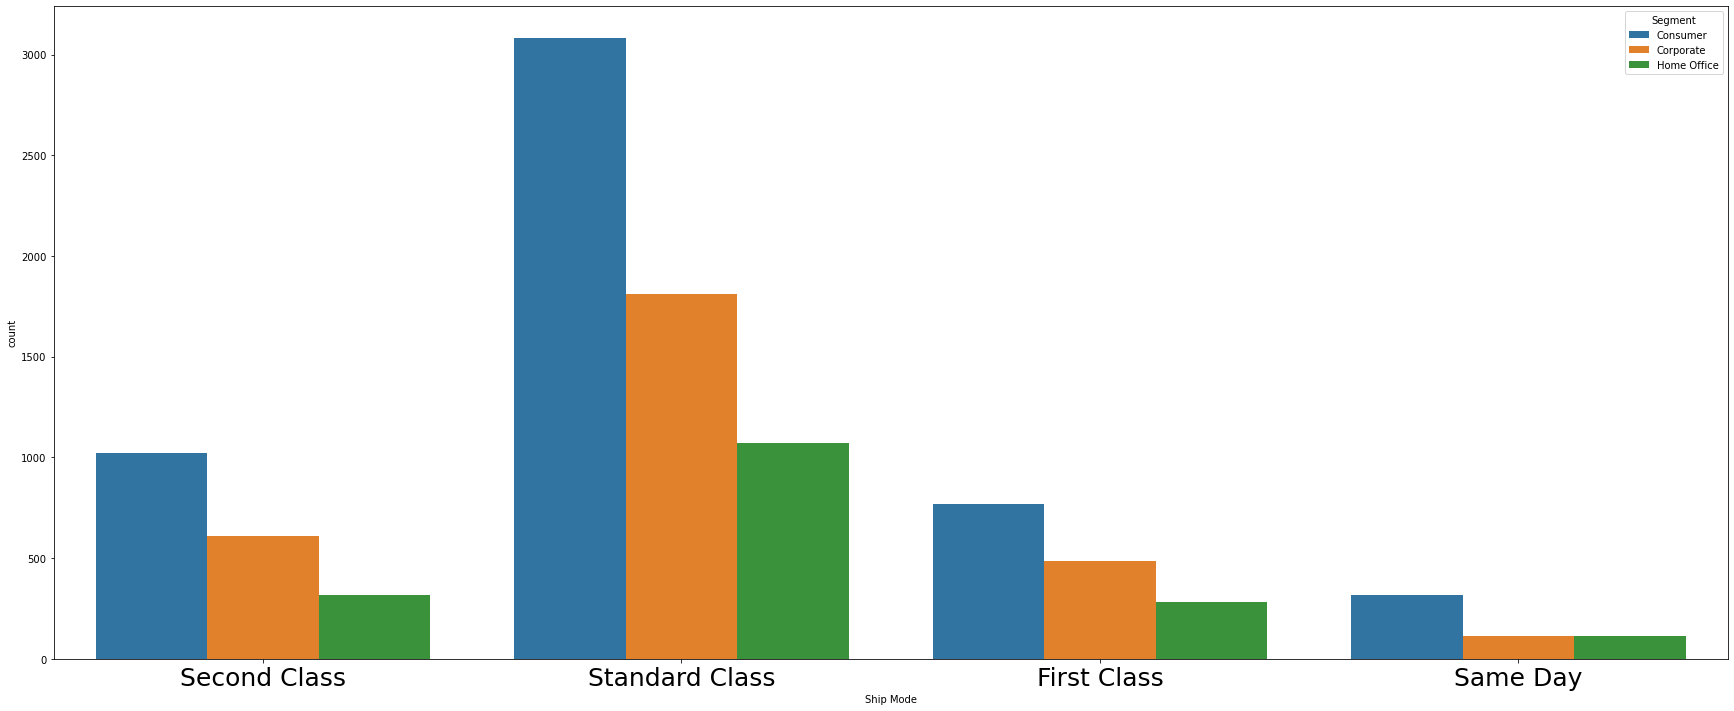

In [64]:
plt.figure(figsize=(30,12))
sns.countplot(x= 'Ship Mode', hue='Segment', data=store)
plt.xticks( fontsize= 25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

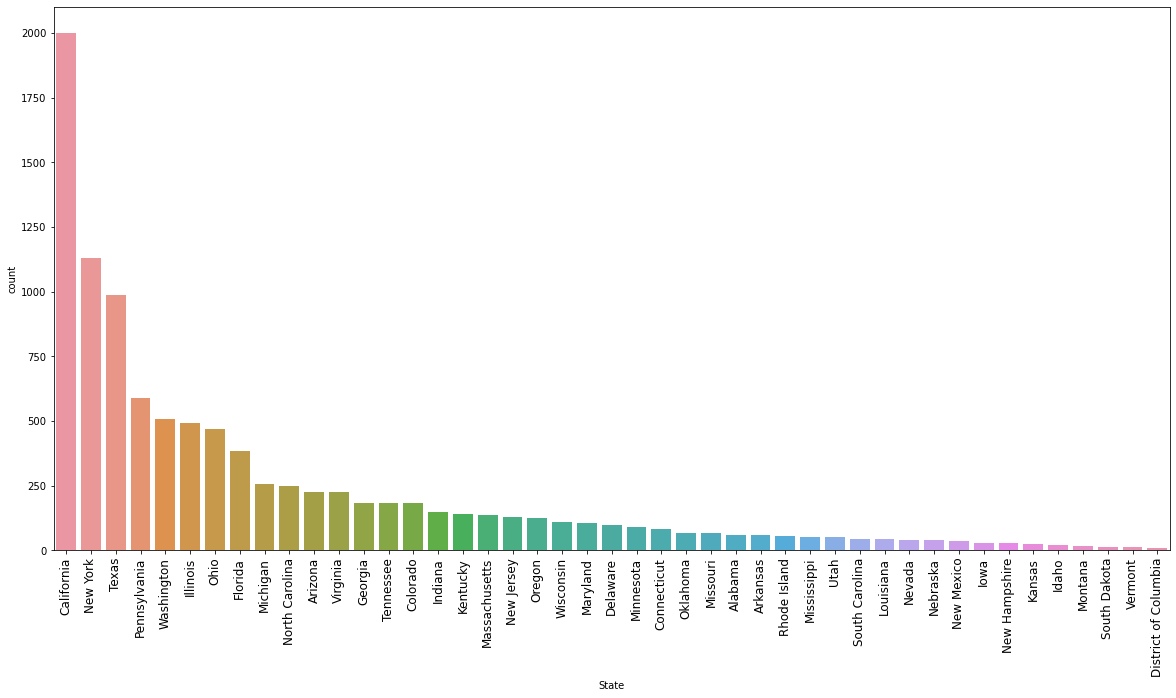

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'State', data=store, order = (store['State'].value_counts().head(45)).index)
plt.xticks(rotation=90, fontsize= 12)

In [88]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Cleaning Data

In [96]:
ship= pd.get_dummies(store['Ship Mode'], drop_first= True)

In [98]:
store.drop(['Ship Mode','Same Day','Second Class', 'Standard Class'], axis = 1, inplace = True)

In [100]:
store = pd.concat([store, ship], axis = 1)

In [102]:
reg= pd.get_dummies(store['Region'], drop_first= True)

In [103]:
store = pd.concat([store, reg], axis = 1)

In [105]:
seg= pd.get_dummies(store['Segment'], drop_first= True)

In [106]:
store = pd.concat([store, seg], axis = 1)

In [107]:
store.head()

,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Same Day,Second Class,Standard Class,East,South,West,Corporate,Home Office
0,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0,1,0,0,1,0,0,0
1,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0,1,0,0,1,0,0,0
2,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0,1,0,0,0,1,1,0
3,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,0,0,1,0,1,0,0,0
4,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0,0,1,0,1,0,0,0


In [108]:
store.drop(['Segment','Country','Region'], axis = 1, inplace = True)

In [109]:
store.head()

,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit,Same Day,Second Class,Standard Class,East,South,West,Corporate,Home Office
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136,0,1,0,0,1,0,0,0
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820,0,1,0,0,1,0,0,0
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714,0,1,0,0,0,1,1,0
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310,0,0,1,0,1,0,0,0
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164,0,0,1,0,1,0,0,0


In [110]:
cat= pd.get_dummies(store['Category'], drop_first= True)

In [111]:
subcat= pd.get_dummies(store['Sub-Category'], drop_first= True)

In [112]:
store = pd.concat([store, cat, subcat], axis = 1)

In [113]:
store.drop(['Sub-Category', 'Category'], axis = 1, inplace = True)

In [114]:
store.head()

,City,State,Postal Code,Sales,Quantity,Discount,Profit,Same Day,Second Class,Standard Class,...,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,Henderson,Kentucky,42420,261.9600,2,0.00,41.9136,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Henderson,Kentucky,42420,731.9400,3,0.00,219.5820,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Los Angeles,California,90036,14.6200,2,0.00,6.8714,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Fort Lauderdale,Florida,33311,957.5775,5,0.45,-383.0310,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Fort Lauderdale,Florida,33311,22.3680,2,0.20,2.5164,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [115]:
store.columns

Index(['City', 'State', 'Postal Code', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Same Day', 'Second Class', 'Standard Class', 'East', 'South',
       'West', 'Corporate', 'Home Office', 'Office Supplies', 'Technology',
       'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers',
       'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper',
       'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object')

# Splitting the data and Building Model

In [139]:
df_train, df_test = train_test_split(store, train_size = 0.7, test_size = 0.3, random_state = 100)

In [140]:
y_train=df_train.pop('Profit')
X_train=df_train

In [156]:
X_train_lm = X_train[['Sales', 'Quantity', 'Discount', 'East', 'South',
       'West', 'Office Supplies', 'Technology', 'Binders', 'Storage']]

In [157]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm.astype(float)).fit()

lr.params

const               34.619537
Sales                0.164395
Quantity            -2.941575
Discount          -320.210758
East               -17.131744
South              -18.885181
West               -25.240701
Office Supplies     27.176276
Technology          34.298744
Binders             83.731179
Storage            -29.541832
dtype: float64

In [158]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     235.6
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:46:21   Log-Likelihood:                -47165.
No. Observations:                6995   AIC:                         9.435e+04
Df Residuals:                    6984   BIC:                         9.443e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              34.6195      8.963     

# Hence the heavy discount, storage and region are creating problems and putting negative impacts on Profit